In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import FixedLocator
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
from math import pi

In [2]:
olympics_data = pd.read_csv('./Data/athlete_events.csv');
results_data = pd.read_csv('./Data/results.csv')

#rimozione delle competizioni artistiche dal dataset
olympics_data = olympics_data[olympics_data['Sport'] != 'Art Competitions']

color1 = '#fdd295'  # light orange
color2 = '#7c1d6f'  # deep purple

#creazione di una lista di colori per la mappa
colors = [color1, color2]

cmap_name = 'Sunsetdark'
cm = LinearSegmentedColormap.from_list(cmap_name, colors)

#ricodifica degli anni dei Giochi Olimpici invernali post-1992
#per abbinarli ai Giochi Olimpici estivi successivi
original = [1994, 1998, 2002, 2006, 2010, 2014]
new = [1996, 2000, 2004, 2008, 2012, 2016]
for orig, new_year in zip(original, new):
    olympics_data['Year'] = olympics_data['Year'].replace(orig, new_year)


#filtraggio dei dati per eseguire il confronto tra Italia e le 3 nazioni principali
comparison_countries = ['ITA', 'USA', 'GBR', 'CHN']
comparison_countries_data = olympics_data[olympics_data['NOC'].isin(comparison_countries)]

#filtraggio dei dati per ottenere un dataset contenente solamente informazioni su atleti italiani
olympics_data = olympics_data[olympics_data['NOC'] == 'ITA']
results_data = results_data[results_data['Nationality'] == 'ITA']

# Distribuzione di genere degli atleti italiani (1900 - 1956 - 2016)

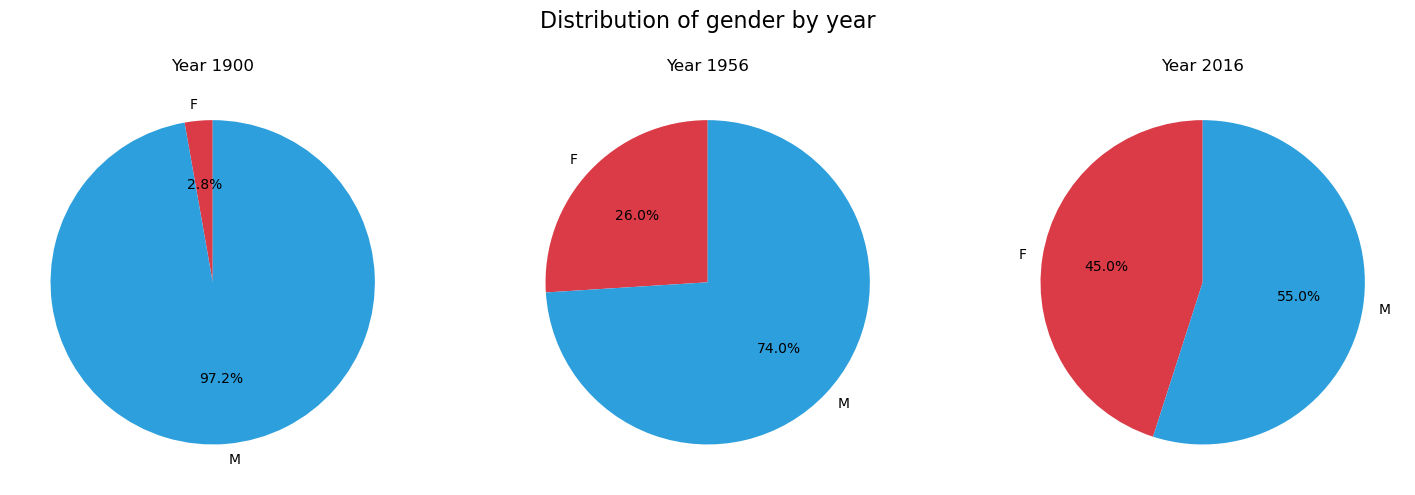

In [4]:
#anni di interesse
years = [1900, 1956, 2016]

#filtraggio dei dati per anno di interessi
filtered_data = olympics_data[olympics_data['Year'].isin(years)]

#calcolo delle percentuali di maschi e femmine per ogni anno
gender_counts = filtered_data.groupby(['Year', 'Sex']).size().unstack()
total_counts = gender_counts.sum(axis=1)
percentages = gender_counts.divide(total_counts, axis=0) * 100


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, year in enumerate(years):
    ax = axes[i]
    percentages.loc[year].plot(kind='pie', autopct='%1.1f%%', ax=ax, startangle=90, colors=['#da3b46', '#2d9fdd'])
    ax.set_title(f'Year {year}')
    ax.set_ylabel('')

fig.suptitle('Distribution of gender by year\n', fontsize=16)

plt.tight_layout()
plt.show()

# Distribuzione di età degli atleti italiani negli anni

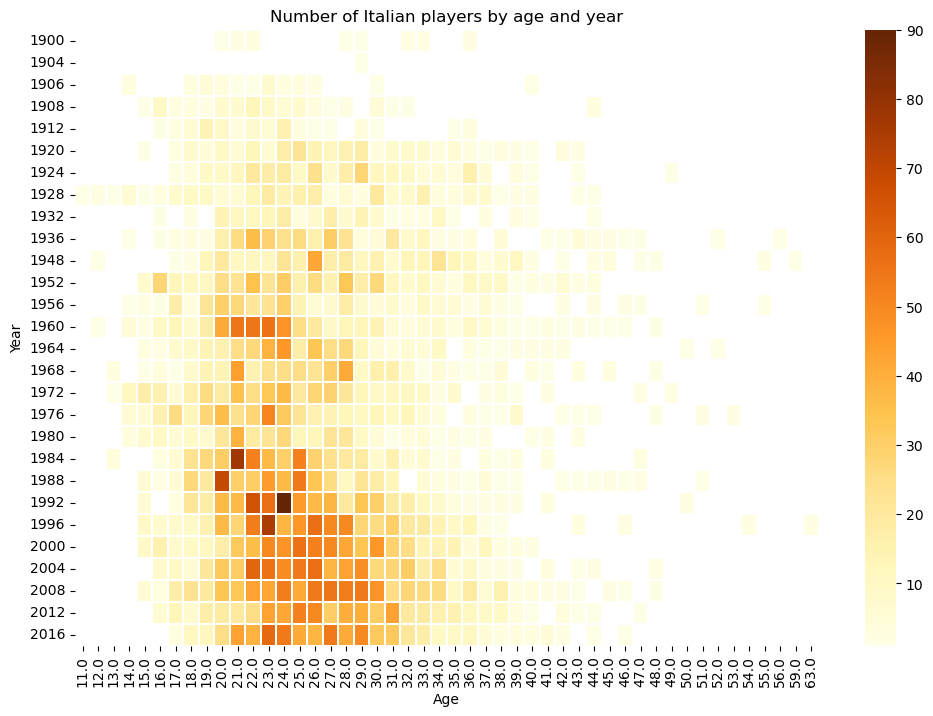

In [6]:
#creazione della tabella con le celle colorabili per la heatmap
pivot = olympics_data.pivot_table(index='Year', columns='Age', values='ID', aggfunc='count')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlOrBr', linecolor='white', linewidths=0.1, annot=False, fmt='g')
plt.title('Number of Italian players by age and year')
plt.xlabel('Age')
plt.ylabel('Year')
plt.show()

# Andamento medio dell'età degli atleti italiani negli anni

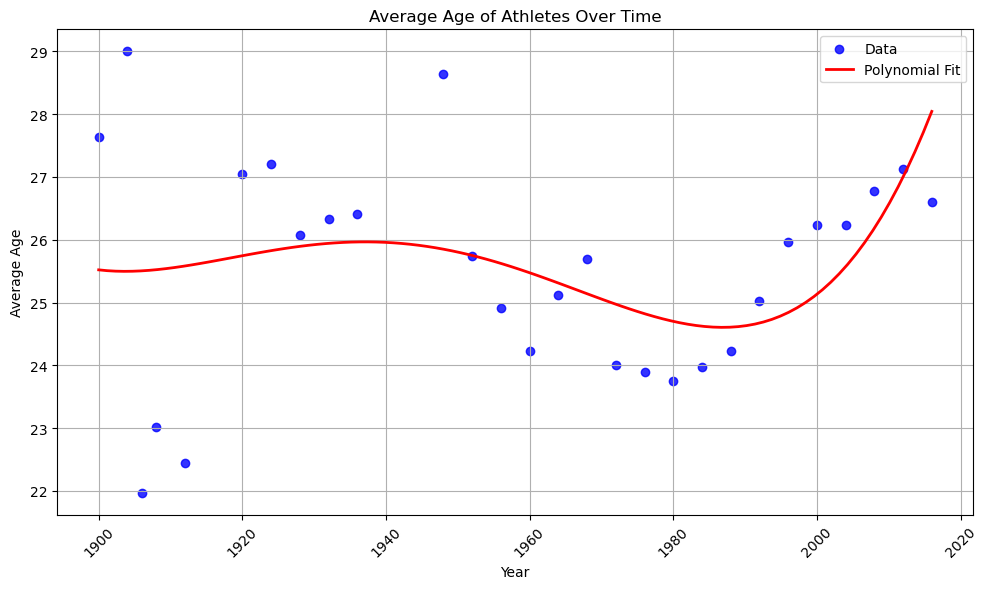

In [8]:
#raggruppamento dei dati per anno ed età
average_age = olympics_data.groupby('Year')['Age'].mean().dropna()

#calcolo della linea di regressione per i dati
coefficients, residuals, _, _, _ = np.polyfit(average_age.index, average_age.values, 4, full=True)

#generazione dei punti per mostrare la linea di regressione liscia
x_smooth = np.linspace(average_age.index.min(), average_age.index.max(), 100)
y_smooth = np.polyval(coefficients, x_smooth)

plt.figure(figsize=(10, 6))
plt.scatter(average_age.index, average_age.values, color='blue', alpha=0.8, label='Data')
plt.plot(x_smooth, y_smooth, color='red', linewidth=2, label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.title('Average Age of Athletes Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Medaglie vinte per anno dall'Italia

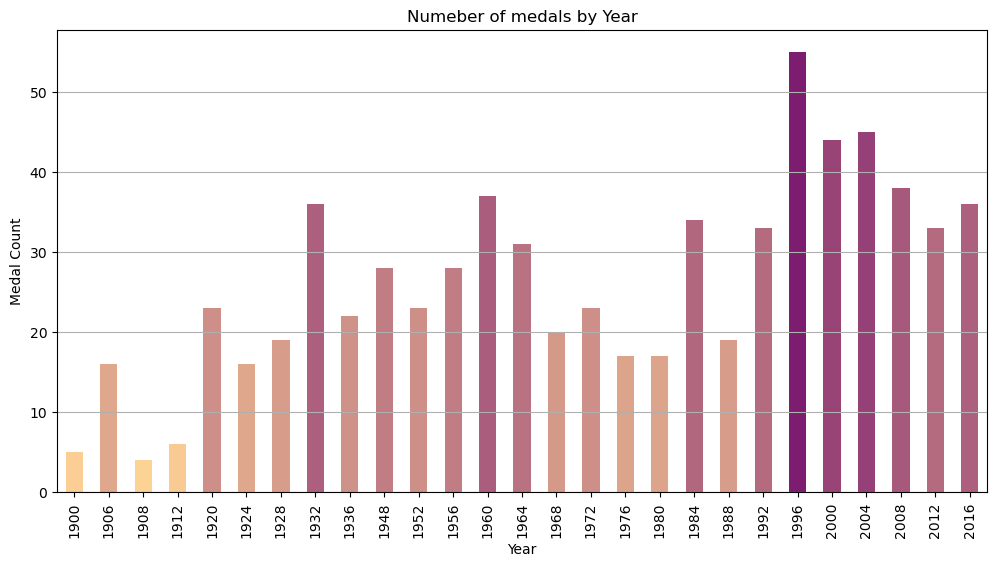

In [10]:
df = olympics_data[['Games', 'Event', 'Year', 'Team', 'Medal']]

df_unique_events = df.drop_duplicates(subset=['Games', 'Event', 'Year', 'Team', 'Medal'])

medals_per_year = df_unique_events.groupby(['Medal', 'Games', 'Year', 'Event', 'Team']).size()

medals_per_year = medals_per_year.groupby(['Year']).sum().sort_index()

normalize = plt.Normalize(vmin=medals_per_year.min(), vmax=medals_per_year.max())

colors = [cm(normalize(value)) for value in medals_per_year]

plt.figure(figsize=(12, 6))
medals_per_year.plot(kind='bar', color=colors)
plt.title('Numeber of medals by Year')
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.grid(axis='y')
plt.show()

# Distribuzione delle medaglie per tipologia 

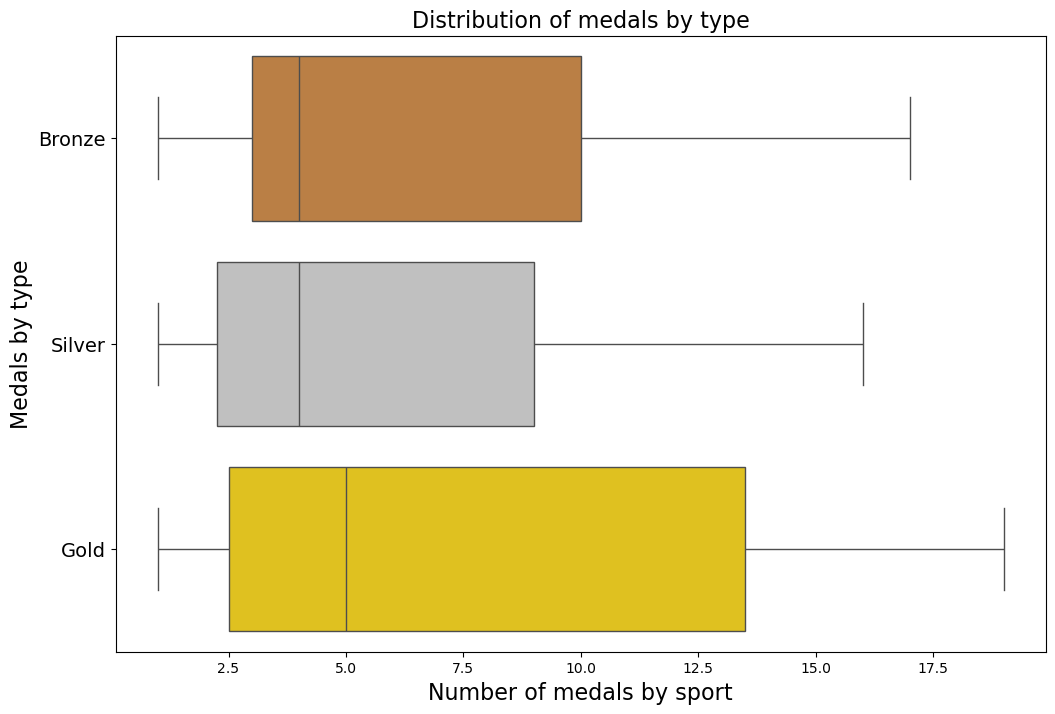

In [12]:

df = olympics_data.dropna(subset=['Medal'])
df = df[['Games', 'Event', 'Sport', 'Team', 'Medal']]
df_unique_events = df.drop_duplicates(subset=['Games', 'Event', 'Sport', 'Team', 'Medal'])

#conteggio del numero di medaglie per ogni sport e medaglia
medals_per_sport = df_unique_events.groupby(['Medal', 'Sport']).size().reset_index(name='Counts')

#creazione di un boxplot delle medaglie
plt.figure(figsize=(12, 8))
medal_colors = {'Bronze': '#cd7f32', 'Silver': '#c0c0c0', 'Gold': '#ffd700'}
boxplot = sns.boxplot(y='Medal', x='Counts', data=medals_per_sport, order=['Bronze', 'Silver', 'Gold'], showfliers=False, palette=medal_colors, hue='Medal')

for median in boxplot.artists:
    median.set_edgecolor('black')

for i, box in enumerate(boxplot.artists):
    medal = boxplot.get_yticklabels()[i].get_text()
    box.set_facecolor(medal_colors[medal])

plt.title('Distribution of medals by type', fontsize=16)
plt.ylabel('Medals by type', fontsize=16)
plt.xlabel('Number of medals by sport', fontsize=16)
boxplot.yaxis.set_major_locator(FixedLocator([0, 1, 2]))
boxplot.set_yticklabels(['Bronze', 'Silver', 'Gold'], fontsize=14)

plt.show()

# Numero di medaglie vinte per sport dall'Italia

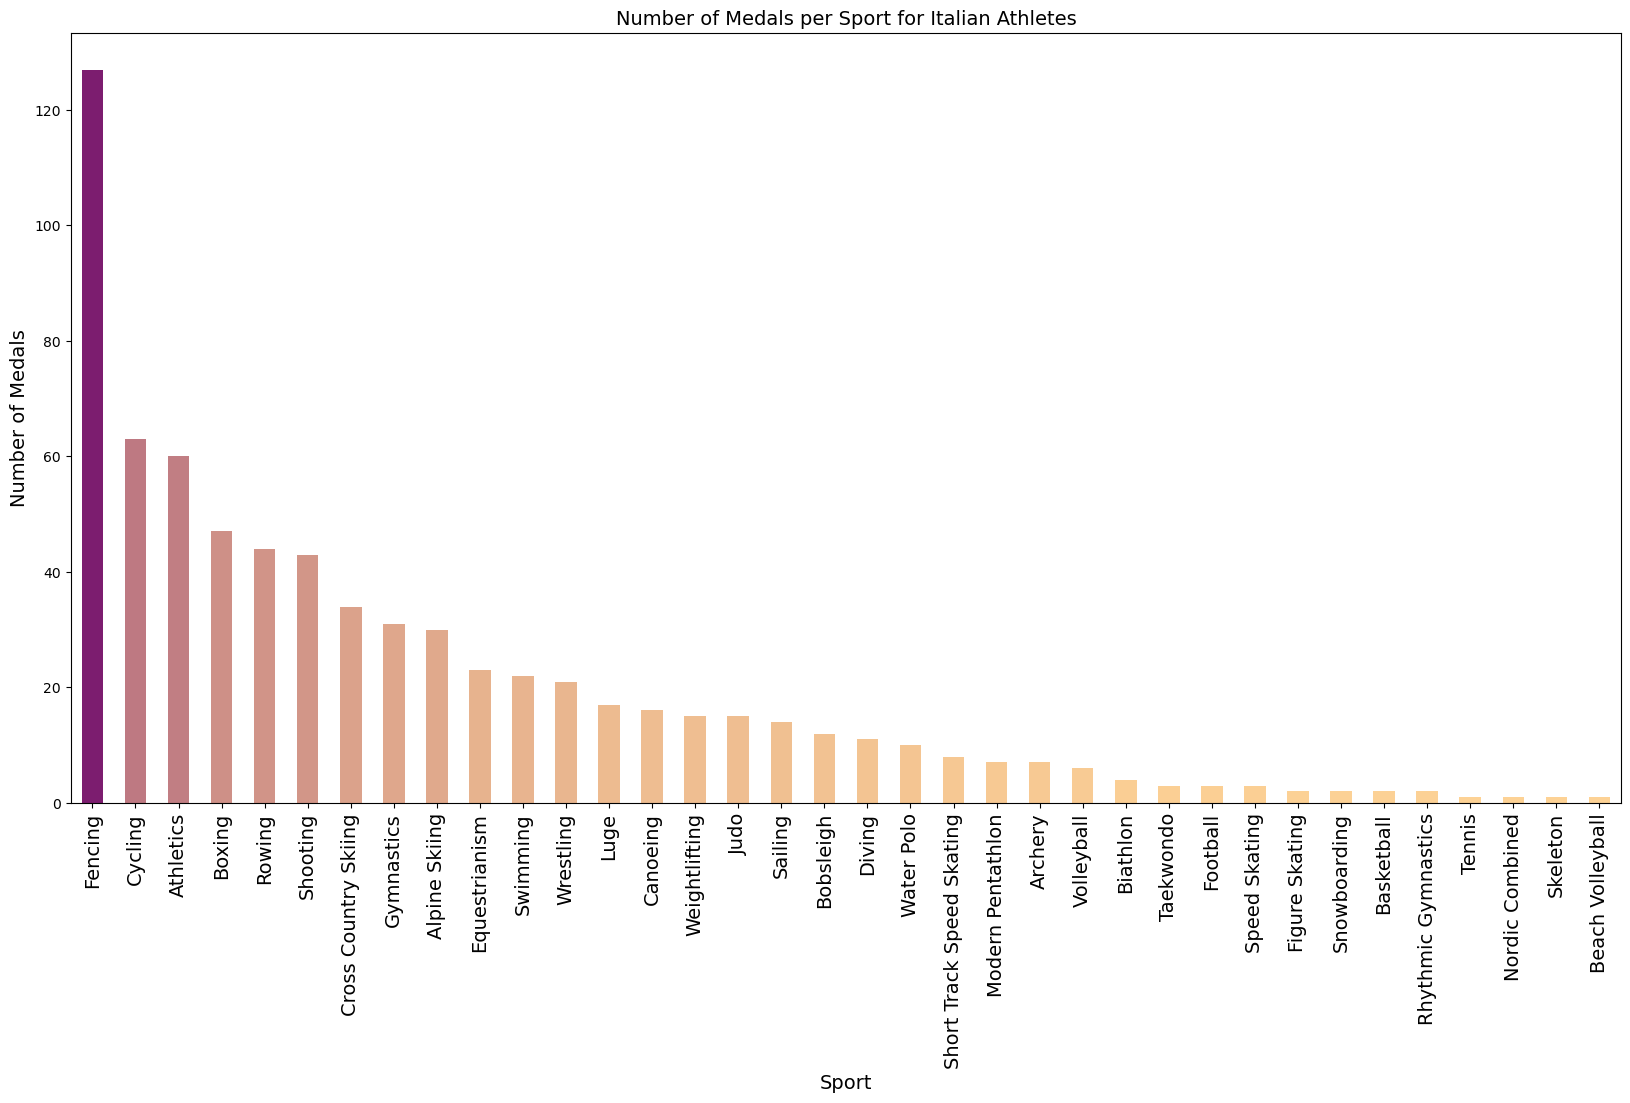

In [28]:
df = olympics_data.dropna(subset=['Medal'])

df = olympics_data[['Games', 'Event', 'Sport', 'Team', 'Medal']]

df_unique_events = df.drop_duplicates(subset=['Games', 'Event', 'Sport', 'Team', 'Medal'])

medals_per_sport = df_unique_events.groupby(['Medal', 'Games', 'Sport', 'Event', 'Team']).size()

medals_per_sport = medals_per_sport.groupby(['Sport']).sum().sort_values(ascending=False)

normalize = plt.Normalize(vmin=medals_per_sport.min(), vmax=medals_per_sport.max())

colors = [cm(normalize(value)) for value in medals_per_sport]
plt.figure(figsize=(20, 10))
medals_per_sport.plot(kind='bar', color=colors)
plt.title('Number of Medals per Sport for Italian Athletes', fontsize=14)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Number of Medals', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

# Top 3 atleti italiani in scherma

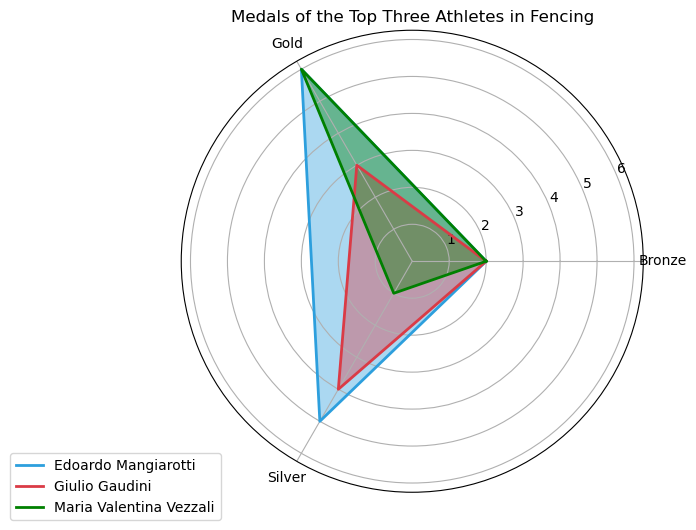

In [14]:
df_fencing = olympics_data[olympics_data['Sport'] == 'Fencing']

#conteggio delle medaglie per atleta
medal_counts = df_fencing.groupby(['Name', 'Medal']).size().unstack(fill_value=0)

#ordinamento degli atleti per numero totale di medaglie
total_medals = medal_counts.sum(axis=1).sort_values(ascending=False)

#vengono mostrati i tre migliori atleti per medaglie vinte
top_athletes = total_medals.index[:3]
top_medals = medal_counts.loc[top_athletes]

categories = ['Bronze', 'Gold', 'Silver']
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(10, 6))

#colori per ogni atleta
colors = ['#2d9fdd', '#da3b46', 'g']

for i, athlete in enumerate(top_athletes):
    values = top_medals.loc[athlete].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=athlete, color=colors[i])
    ax.fill(angles, values, colors[i], alpha=0.4)

plt.xticks(angles[:-1], categories)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.title('Medals of the Top Three Athletes in Fencing')

plt.show()


# Andamento medio delle medaglie vinte da USA, UK, Cina e Italia negli anni 

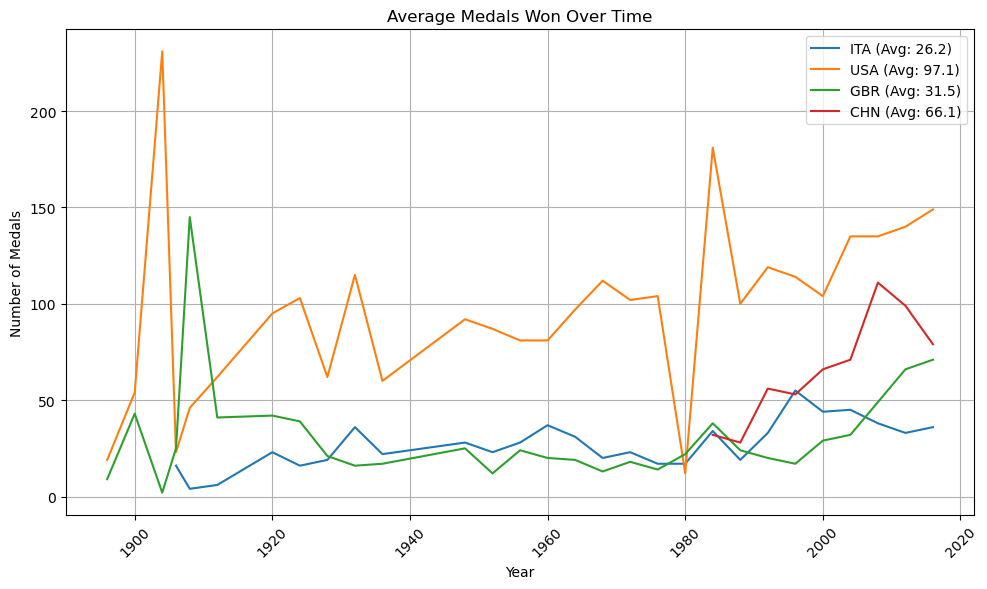

In [15]:
df = comparison_countries_data.dropna(subset=['Medal'])

df = df[['NOC', 'Games', 'Event', 'Year', 'Team', 'Medal']]

df_unique_events = df.drop_duplicates(subset=['NOC', 'Games', 'Event', 'Year', 'Team', 'Medal'])

#conteggio del numero totale di medaglie (oro, argento, bronzo) per ogni anno e paese
medals_count = df_unique_events.groupby(['Year', 'NOC'])['Medal'].count().unstack()

#calcolo del numero medio di medaglie per ogni paese
average_medals = medals_count.mean(axis=1).dropna()

plt.figure(figsize=(10, 6))

for country in comparison_countries:
    country_average = medals_count[country].mean()
    plt.plot(medals_count.index, medals_count[country], label=f'{country} (Avg: {country_average:.1f})')

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Average Medals Won Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()